# Funktion
- Vergleich von Datensätzen
- Input: sdf-Dateinen
- Output: Anzahl und Liste gleicher Elemente + visuelle Darstellung (Venn-Diagramm)

In [1]:
'''Importieren der Libraries '''

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import seaborn as sns
from typing import List, Any

import os

import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [2]:
'''Datensätze für den Vergleich importieren'''

set1 = Chem.SDMolSupplier('data/set_chlorbenzene.sdf')
set2 = Chem.SDMolSupplier('data/set_phenole.sdf')
set3 = Chem.SDMolSupplier('data/4xmol.sdf')
set4 = Chem.SDMolSupplier('data/4xmol.sdf')

OSError: File error: Bad input file data/set_chlorbenzene.sdf

In [3]:
data_dir = os.path.normpath('data')

# Suggestion 1
molecule_sets = []
# Loop over names in data directory
for molecule_set_name in os.listdir(data_dir):
    # Assemble complete path of every file
    molecule_set_path = os.path.join(data_dir, molecule_set_name)
    # Read every sd file and append SDMolSupplier to list
    molecule_sets.append(Chem.SDMolSupplier(molecule_set_path))

molecule_sets


In [4]:
# Suggestion 2 - How about a dictionary?
molecule_sets = {}
# Loop over names in data directory
for molecule_set_name in os.listdir(data_dir):
    # Assemble complete path of every file
    molecule_set_path = os.path.join(data_dir, molecule_set_name)
    # Read every sd file and add name-SDMolSupplier pair to dict
    molecule_sets[molecule_set_name] = Chem.SDMolSupplier(molecule_set_path)

molecule_sets

{'coconut_structure_search_chlorobenzene_result.sdf': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x1b4a3a27e30>,
 'coconut_structure_search_phenole_result.sdf': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x1b4a3bb13f0>}

### Get identifier lists from SDMolSupplier objects

In [15]:
'''SDF in InChiKey-Liste umwandeln'''

# 1 - English!
# 2 - Use descriptive names
# 3 - Avoid redundancy
# 4 - Typing can be useful
# 5 - Docstrings!
# 6 - Is the InChI key really what we want here?


def inchiliste(Datensatz, Vergleich = "InChi"):
    liste = []
    if Vergleich == "Smiles":
        for mol in Datensatz:
            smiles = Chem.MolToSmiles(mol)
            liste.append(smiles)
    else:
        for mol in Datensatz:
            inchikey = Chem.MolToInchiKey(mol)
            liste.append(inchikey)
    return liste

In [22]:
liste1 = inchiliste(set1)
liste2 = inchiliste(set2)
liste3 = inchiliste(set3)
liste4 = inchiliste(set4)

NameError: name 'set1' is not defined

In [14]:
# Ressource for naming conventions
# https://realpython.com/python-pep8/#naming-styles

def get_identifier_list(
    molecule_set: Chem.SDMolSupplier, 
    id_type : str = "InChIKey"
    ) -> List[str]:
    """
    This function returns a list of Chemical InChi or Smiles str for all molecules
    in a given SDMolSupplier object.

    Args:
        molecule_set (Chem.SDMolSupplier):
        id_type (str, optional): "InChIKey" or " "Smiles". Defaults to "InChIKey".

    Raises:
        ValueError: if ID_type is not "InChIKey" or "SMILES"

    Returns:
        List[str]: List of identifiers based on given molecules
    """
    identifier_list = []
    for mol in molecule_set:
        if id_type == "Smiles":
            identifier = Chem.MolToSmiles(mol)
        elif id_type == "InChIKey":
            identifier = Chem.MolToInchiKey(mol)
        else:
            raise ValueError('id_type argument needs to be "Smiles" or "InChIKey"!')
        identifier_list.append(identifier)
    return identifier_list
    

In [12]:
identifier_lists = []
for mol_set_name in molecule_sets.keys():
    identifier_list = get_identifier_list(molecule_sets[mol_set_name])
    identifier_lists.append(identifier_list)
identifier_lists


[['MVPPADPHJFYWMZ-UHFFFAOYSA-N',
  'OCJBOOLMMGQPQU-UHFFFAOYSA-N',
  'PBKONEOXTCPAFI-UHFFFAOYSA-N',
  'RFFLAFLAYFXFSW-UHFFFAOYSA-N',
  'ZPQOPVIELGIULI-UHFFFAOYSA-N',
  'HFZWRUODUSTPEG-UHFFFAOYSA-N',
  'HOLHYSJJBXSLMV-UHFFFAOYSA-N',
  'HORNXRXVQWOLPJ-UHFFFAOYSA-N',
  'ISPYQTSUDJAMAB-UHFFFAOYSA-N',
  'RANCECPPZPIPNO-UHFFFAOYSA-N',
  'UMPSXRYVXUPCOS-UHFFFAOYSA-N',
  'WDNBURPWRNALGP-UHFFFAOYSA-N',
  'WXNZTHHGJRFXKQ-UHFFFAOYSA-N',
  'YOYAIZYFCNQIRF-UHFFFAOYSA-N',
  'ACMJJQYSPUPMPN-UHFFFAOYSA-N',
  'AJPXTSMULZANCB-UHFFFAOYSA-N',
  'AVYGCQXNNJPXSS-UHFFFAOYSA-N',
  'BRPSAOUFIJSKOT-UHFFFAOYSA-N',
  'CSFDTBRRIBJILD-UHFFFAOYSA-N',
  'FPYUJUBAXZAQNL-UHFFFAOYSA-N',
  'JCYROOANFKVAIB-UHFFFAOYSA-N',
  'JDMFXJULNGEPOI-UHFFFAOYSA-N',
  'KQCMTOWTPBNWDB-UHFFFAOYSA-N',
  'LULAYUGMBFYYEX-UHFFFAOYSA-M',
  'NGIRMPARLVGMPX-UHFFFAOYSA-M',
  'PNPCRKVUWYDDST-UHFFFAOYSA-N',
  'SRWILAKSARHZPR-UHFFFAOYSA-N',
  'VWUFOZAFKYOZJB-UHFFFAOYSA-N',
  'XRAKCYJTJGTSMM-UHFFFAOYSA-N',
  'XWBTZHDDWRNOQH-UHFFFAOYSA-N',
  'YSEMCVG

In [13]:
get_identifier_list(mol_set_name, "IUPAC_name")

ValueError: id_type argument needs to be "Smiles" or "InChIKey"!

### Creation of Venn diagrams for molecule set comparison

0

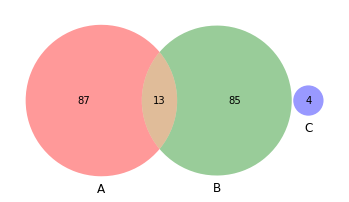

In [7]:
'''Vergleich zwischen drei Listen'''

def vergleich(list1, list2, list3):
    s1 = set(list1)
    s2 = set(list2)
    s3 = set(list3)
    s_all = set.intersection(s1, s2, s3)
    venn3([s1, s2, s3])
    return len(s_all) 

vergleich(liste1, liste2, liste3)

13

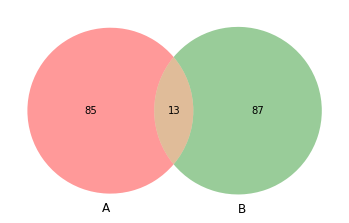

In [27]:
'Vergleich zwischen zwei oder drei Listen'

def vergleich2(list1, list2, list3):
    if list3:
        s1 = set(list1)
        s2 = set(list2)
        s3 = set(list3)
        s_all = set.intersection(s1, s2, s3)
        venn3([s1, s2, s3])
        return len(s_all)
    elif list2:
        s1 = set(list1)
        s2 = set(list2)
        s_all = set.intersection(s1, s2)
        venn2([s1, s2])
        return len(s_all)
    else:
        return 'Kein Vergleich'
    
vergleich2(liste2, liste1, False)

In [55]:
def get_intersection(
    *args: List[Any]
    ) -> set:
    """
    This function takes two or three lists of any type and returns the
    set of elements that are in all given lists. Additionally, it generates
    a venn diagram which is displayed when this function is called in a 
    Jupyter Notebook.

    Raises:
        Exception: An exception is raised if there are not two or three lists.

    Returns:
        set: Set of elements in intersection
    """
    sets = [set(arg) for arg in args]
    if len(args) == 2:
        venn2(sets)
    elif len(args) == 3:
        venn3(sets)
    else:
        raise Exception('The number of given sets needs to be 2 or 3.')
    return set.intersection(*sets)
    

{'AJPXTSMULZANCB-UHFFFAOYSA-N',
 'AQJFATAFTQCRGC-UHFFFAOYSA-N',
 'BOFRXDMCQRTGII-UHFFFAOYSA-N',
 'CFKMVGJGLGKFKI-UHFFFAOYSA-N',
 'HFZWRUODUSTPEG-UHFFFAOYSA-N',
 'HORNXRXVQWOLPJ-UHFFFAOYSA-N',
 'ISPYQTSUDJAMAB-UHFFFAOYSA-N',
 'NWSIFTLPLKCTSX-UHFFFAOYSA-N',
 'QGNLHMKIGMZKJX-UHFFFAOYSA-N',
 'RANCECPPZPIPNO-UHFFFAOYSA-N',
 'UMPSXRYVXUPCOS-UHFFFAOYSA-N',
 'WDNBURPWRNALGP-UHFFFAOYSA-N',
 'WXNZTHHGJRFXKQ-UHFFFAOYSA-N'}

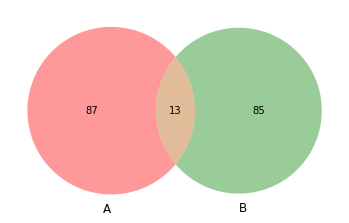

In [56]:
get_intersection(*identifier_lists)

{2, 3}

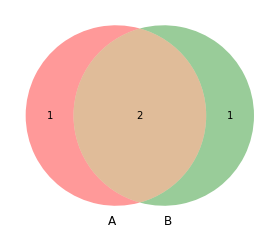

In [41]:
get_intersection([1,2,3], [2,3,4])

C:\Users\Otto Brinkhaus\anaconda3\envs\RanDepict\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


{3}

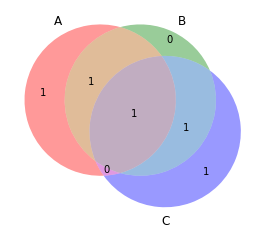

In [42]:
get_intersection([1,2,3], [2,3,4], [3,4,5])

In [43]:
get_intersection([1,2], [3,4], [5,6], [7,8])

Exception: The number of given sets needs to be 2 or 3.